In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [190]:
df = pd.read_csv('Student_performance_data _.csv')

In [192]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
         StudentID 

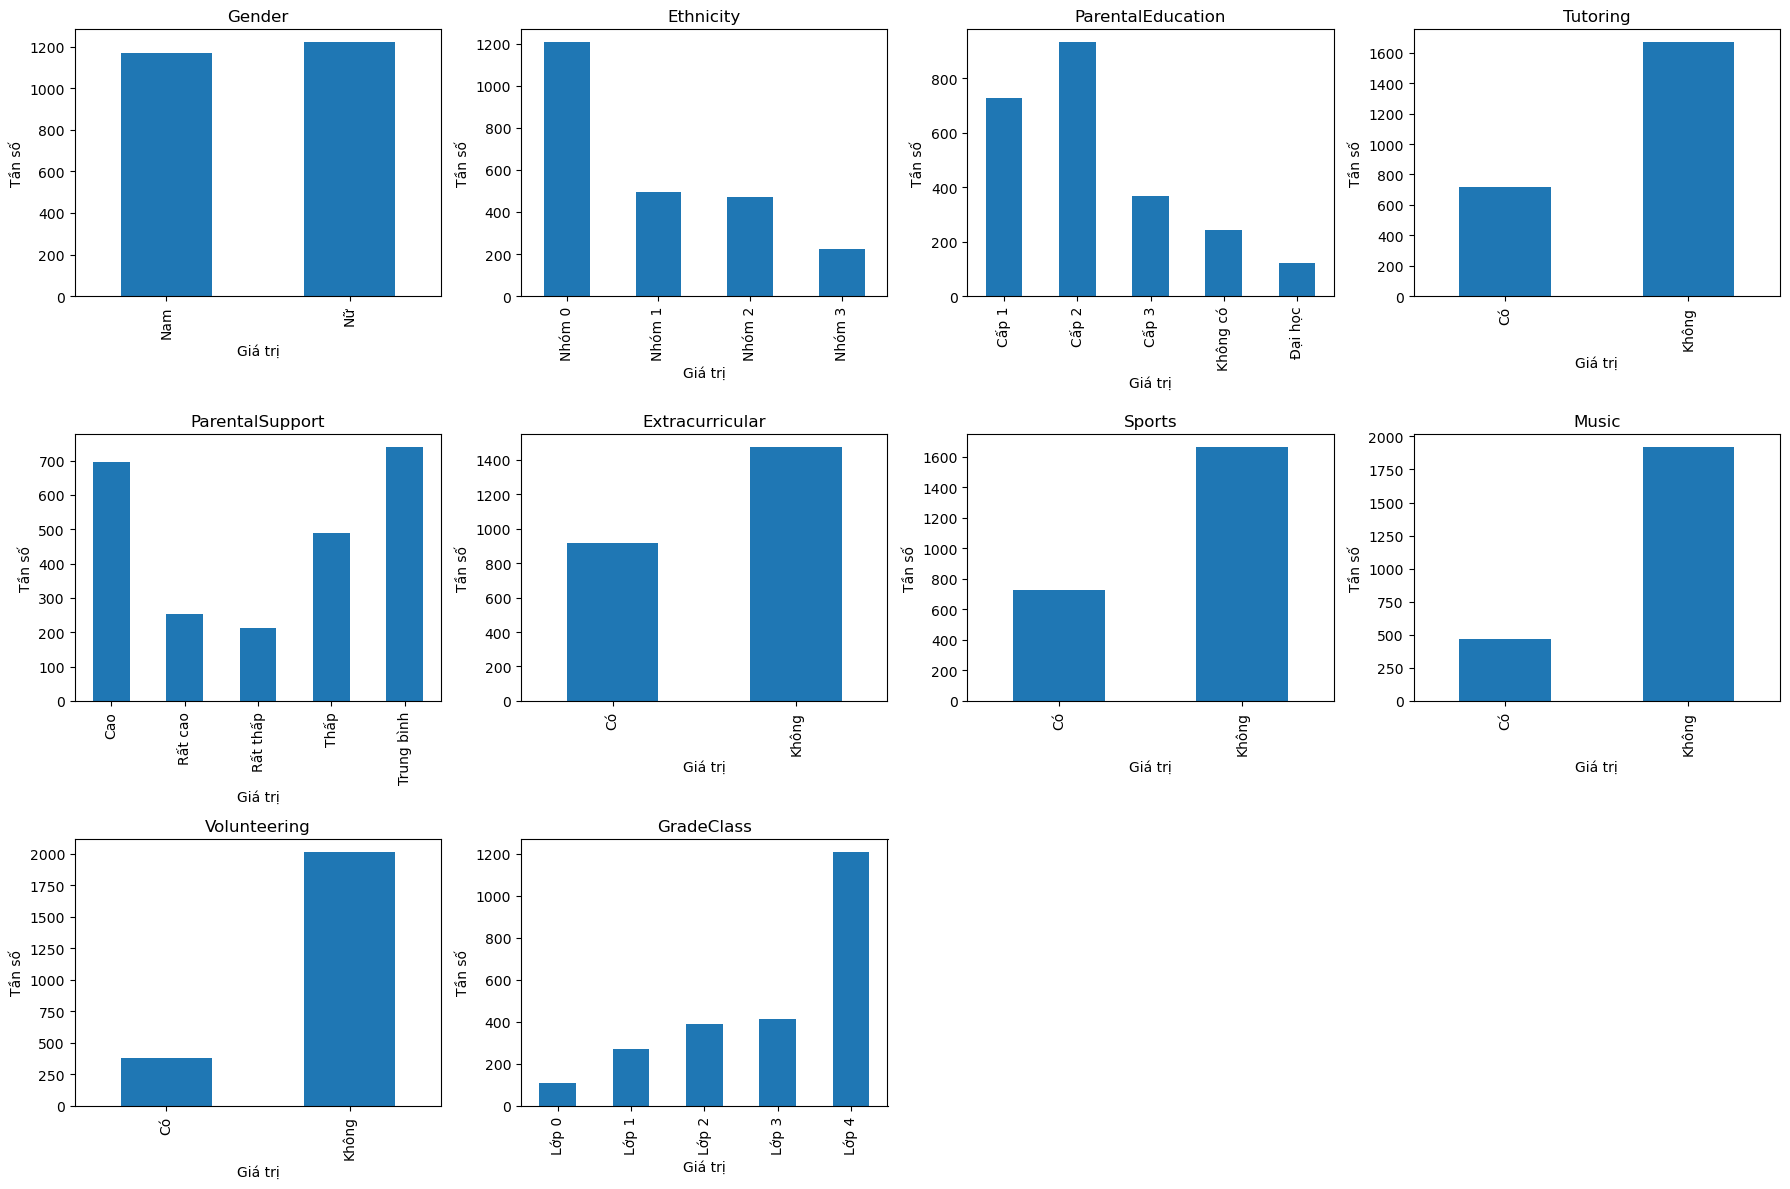

In [194]:

label_dict = {
    'Gender': {0: 'Nam', 1: 'Nữ'},
    'Ethnicity': {0: 'Nhóm 0', 1: 'Nhóm 1', 2: 'Nhóm 2', 3: 'Nhóm 3'},
    'ParentalEducation': {0: 'Không có', 1: 'Cấp 1', 2: 'Cấp 2', 3: 'Cấp 3', 4: 'Đại học'},
    'Tutoring': {0: 'Không', 1: 'Có'},
    'ParentalSupport': {0: 'Rất thấp', 1: 'Thấp', 2: 'Trung bình', 3: 'Cao', 4: 'Rất cao'},
    'Extracurricular': {0: 'Không', 1: 'Có'},
    'Sports': {0: 'Không', 1: 'Có'},
    'Music': {0: 'Không', 1: 'Có'},
    'Volunteering': {0: 'Không', 1: 'Có'},
    'GradeClass': {0: 'Lớp 0', 1: 'Lớp 1', 2: 'Lớp 2', 3: 'Lớp 3', 4: 'Lớp 4'}
}

plt.figure(figsize=(18, 12))

for i, feature in enumerate(label_dict.keys(), 1):
    plt.subplot(3, 4, i)
    value_counts = df[feature].map(label_dict[feature]).value_counts().sort_index()
    value_counts.plot(kind='bar')
    plt.title(feature)
    plt.xlabel('Giá trị')
    plt.ylabel('Tần số')

plt.tight_layout()
plt.show()


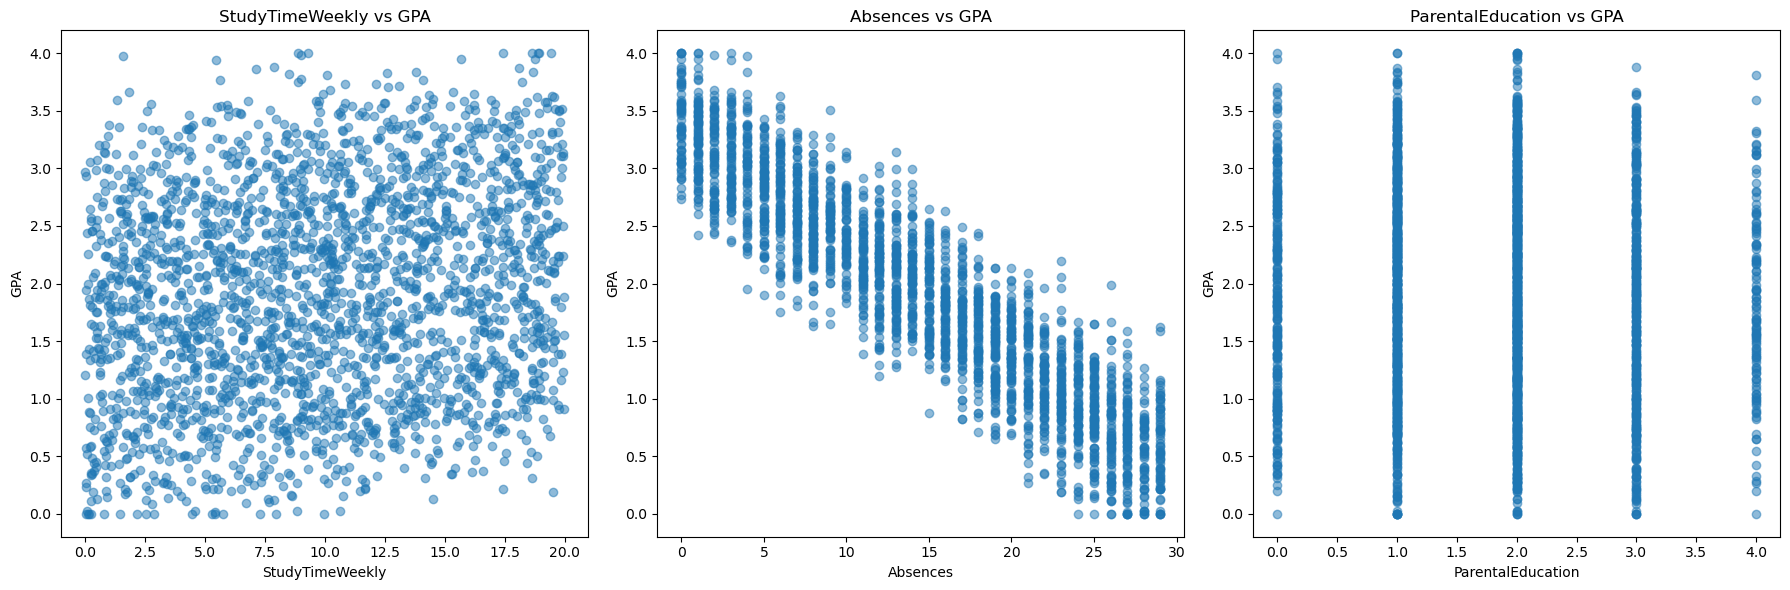

In [195]:

target = 'GPA'

features_to_compare = ['StudyTimeWeekly', 'Absences', 'ParentalEducation']

plt.figure(figsize=(18, 6))


for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


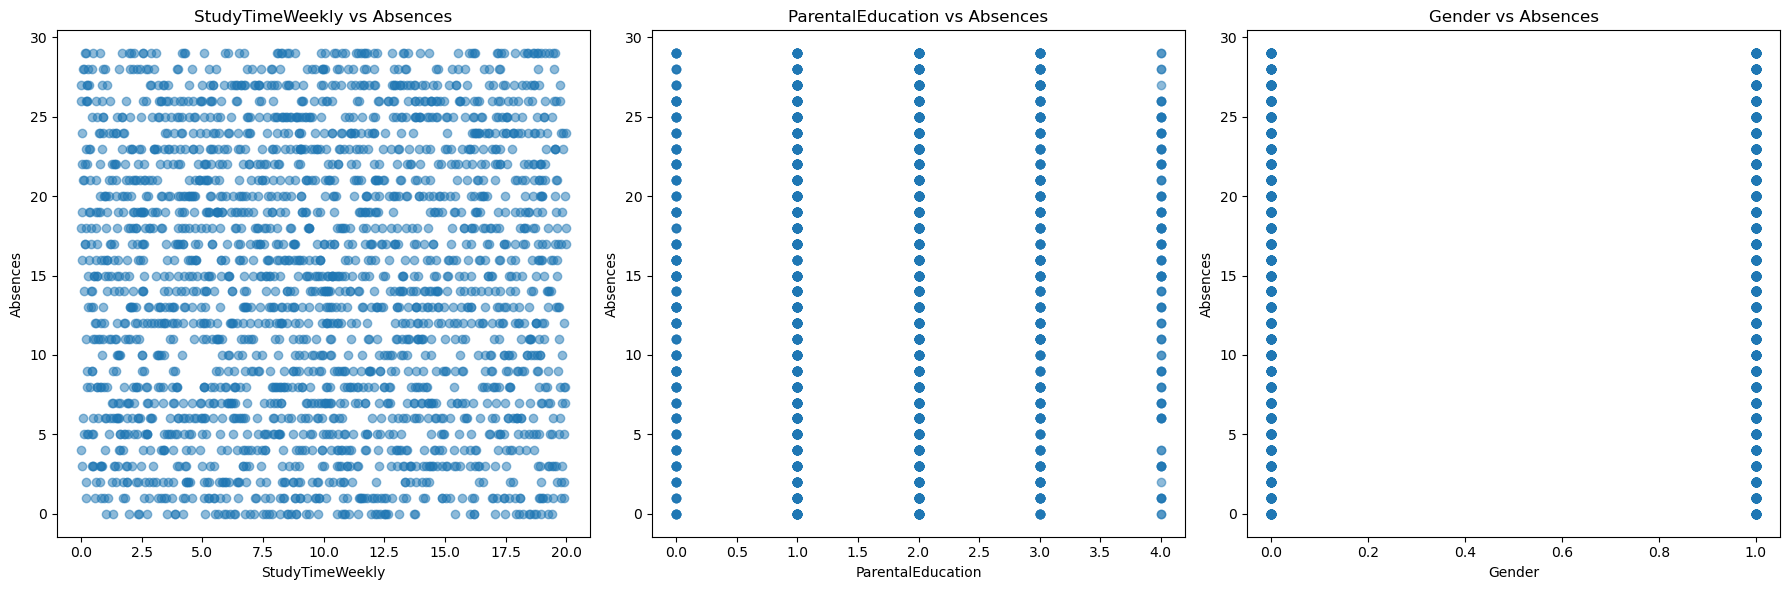

In [196]:

target = 'Absences'  

features_to_compare = ['StudyTimeWeekly', 'ParentalEducation', 'Gender'] 


plt.figure(figsize=(18, 6))

for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

Cross-Validation Mean Squared Error (MSE): 0.06266822807630017
R^2 Score on Test Set: 0.9307494837785475


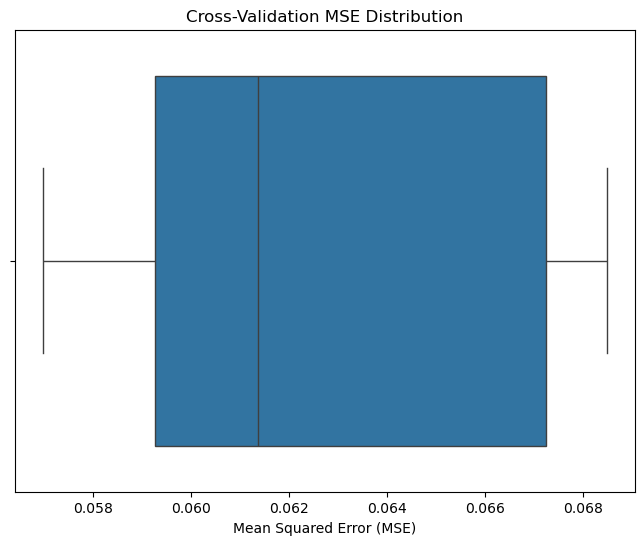

In [197]:

X = df.drop(columns=['GPA', 'GradeClass', 'StudentID'])  
y = df['GPA']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)


cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Cross-Validation Mean Squared Error (MSE): {-cv_scores.mean()}')
print(f'R^2 Score on Test Set: {r2}')

mse_scores = -cv_scores

plt.figure(figsize=(8, 6))
sns.boxplot(data=mse_scores, orient='h')
plt.title('Cross-Validation MSE Distribution')
plt.xlabel('Mean Squared Error (MSE)')
plt.show()

Mean Squared Error (MSE) on Test Set: 0.058311245658964006
R^2 Score on Test Set: 0.9307494837785475


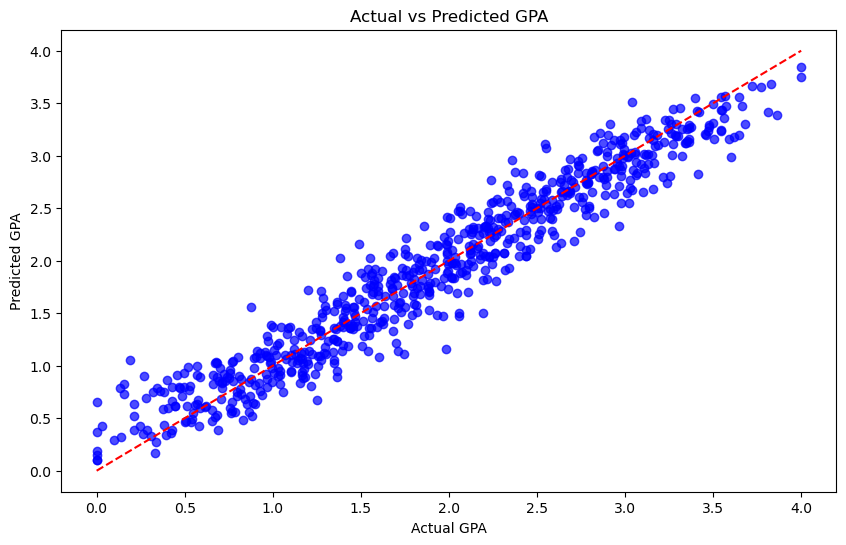

In [199]:
#hocmay

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('Student_performance_data _.csv')

X = df.drop(columns=['GPA', 'GradeClass', 'StudentID']) 
y = df['GPA']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'R^2 Score on Test Set: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')
plt.show()

In [ ]:
#hoc sau
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Student_performance_data _.csv')


X = df.drop(columns=['GPA', 'GradeClass', 'StudentID'])
y = df['GPA']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'R^2 Score on Test Set: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')
plt.show()

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.3875 
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.1065
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 0.0798
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.0642
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.0577
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.0482
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.0444
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.0421
Epoch 9/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 0.0431
Epoch 10/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.0358
Epoch 11/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - loss: 0.0385
Epoch 12/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.0382
Epoch 13/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.0346
Epoch 14/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 0.0334
Epoch 15/100
168/168 ━━━━━

In [ ]:

X = df.drop(columns=['GPA', 'GradeClass', 'StudentID'])  
y = df['GPA'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'R^2 Score on Test Set: {r2}')


correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


df = pd.read_csv('Student_performance_data _.csv')


x = df.drop(['StudentID',  'Age', 'Gender', 'Sports', 'Music', 'GPA', 'GradeClass', 'Volunteering', 'Ethnicity'], axis=1)

y = df['GradeClass']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=42)

# mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=0.0001, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(200, 150, 100), max_iter=1500, random_state=42)


# mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, learning_rate='adaptive', learning_rate_init=0.001, random_state=42)

mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'R^2 Score on Test Set: {r2}')